In [45]:
import sys
sys.path.append("..")

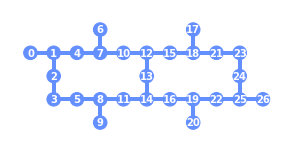

In [46]:
from mock_backends.ibm import *
pb = FalconR4()
from utils.qiskit_patch.gate_map import plot_gate_map
plot_gate_map(pb)#, qubit_coordinates=pb.qubit_coordinates)

In [47]:
import itertools
from qiskit.test.mock.utils.configurable_backend import ConfigurableFakeBackend
from qiskit.providers.models import BackendProperties
from qiskit.providers.models.backendproperties import Nduv, Gate
from qiskit.exceptions import QiskitError
from qiskit.circuit.library.standard_gates import (
    IGate,
    RXGate,
    RYGate,
    CZGate,
    SwapGate,
    U3Gate
)


class FakeExampleV2(ConfigurableFakeBackendV2):
    """A mock backendv2"""

    def __init__(self):
        qubits = list(range(4))
        coupling_map = [[0, 1], [0, 2], [0, 3], [1, 2]]
        qubit_coordinates = [[0, 1], [1, 0], [1, 1], [1, 2]]

        gate_configuration = {}
        gate_configuration[IGate] = [(i,) for i in qubits]

        # only can do RXGates on qubits 0 and 4
        gate_configuration[U3Gate] = [
            (i,) for i in list(set(qubits).difference([1, 2]))
        ]
        # can do RY on all qubits
        gate_configuration[RYGate] = [(i,) for i in qubits]

        # can do CZ on all pairs in coupling map
        gate_configuration[CZGate] = [(i, j) for i, j in coupling_map]

        # can only measure qubits 2,3
        measurable_qubits = [2, 3]

        super().__init__(
            name="mock_example",
            description="a mock backend",
            n_qubits=len(qubits),
            gate_configuration=gate_configuration,
            parameterized_gates={U3Gate: ["theta", "phi", "lam"], RYGate: ["theta"]},
            measurable_qubits=measurable_qubits,
            qubit_coordinates=qubit_coordinates,
        )


NameError: name 'ConfigurableFakeBackendV2' is not defined

In [ ]:
from fake_hypercube import FakeHypberCubeV2
FakeHypberCubeV2(n_dimension=3)